In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.statespace.sarimax import SARIMAX

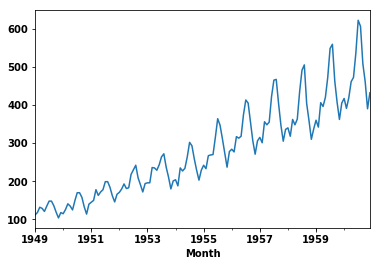

In [3]:
# 月ごとの飛行機の乗客数データ
import requests
import io

url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))
df_content = content.copy()
df_content['Month'] = pd.to_datetime(df_content['Month'], infer_datetime_format=True)
y = pd.Series(df_content["#Passengers"].values, index=df_content['Month'])
y = y.astype('f')
y.plot()

In [4]:
y120 = y[:120]

In [5]:
p, d, q, sp, sd, sq = 2, 1, 2, 1, 1, 1
seasonal = 12

# SARIMAX(p=2,d=1,q=2; P=1,D=1,Q=1,s=12)モデルの当てはめ
result = SARIMAX(
    y120, order=(p,d,q), 
    seasonal_order=(sp,sd,sq,seasonal), 
    enforce_stationarity = False, 
    enforce_invertibility = False
).fit()
# 結果確認
print(result.summary())

C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(2, 1, 2)x(1, 1, 1, 12)   Log Likelihood                -343.463
Date:                            Thu, 25 Jul 2019   AIC                            700.926
Time:                                    13:39:31   BIC                            718.579
Sample:                                01-01-1949   HQIC                           708.051
                                     - 12-01-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2791      0.573      0.487      0.626      -0.844       1.402
ar.L2          0.4689      0.440   

<BarContainer object of 120 artists>

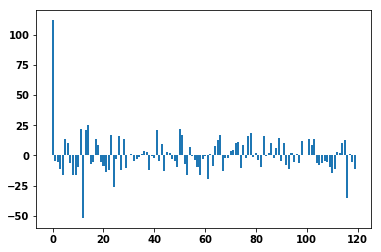

In [6]:
# 残差の抽出
res = result.resid
# 残差の出力
plt.bar(range(len(res)), res)

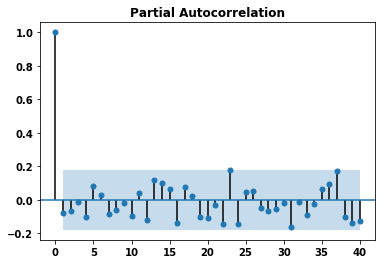

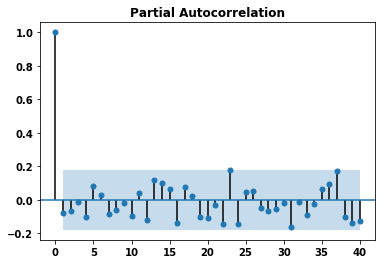

In [7]:
# 偏自己相関
tsaplots.plot_pacf(res, lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


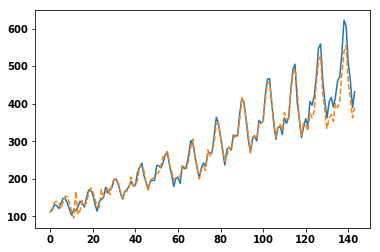

In [8]:
# 将来予測
plt.plot(y.values, label="observation")
plt.plot(np.hstack([y120[0], 
                    result.fittedvalues[1:], 
                    result.forecast(24)]), 
         '--', label="forecast")